In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
from random import random
from math import exp, sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel('PRML-bonus.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
for i in df.columns:
  print("Column", i, ":", df[i].nunique(), "->", df[i].unique())
  print()

Column Airline : 12 -> ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

Column Date_of_Journey : 44 -> ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']

Column Source : 5 -> ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Column Destination : 6 -> ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

Column Route : 128 -> 

# Data Pre-processing

## Checking Null Values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.shape

(10682, 11)

In [12]:
for i in df.columns:
  print(i,": ",df[i].nunique())

Airline :  12
Date_of_Journey :  44
Source :  5
Destination :  6
Route :  128
Dep_Time :  222
Arrival_Time :  1343
Duration :  368
Total_Stops :  5
Additional_Info :  10
Price :  1870


## Feature Transformation

As seen in df.info(), most of the data is an object/string and has to be converted into int/float to be visualised.

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
df["journey_day"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day
df["journey_month"] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y").dt.month
df.drop(["Date_of_Journey"], axis = 1, inplace = True)
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month'],
      dtype='object')

In [16]:
df["dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'dep_hour', 'dep_min'],
      dtype='object')

In [17]:
df["arrival_hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["arrival_min"] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min'],
      dtype='object')

In [18]:
df['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [19]:
df['duration_min']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df.drop(["Duration"], axis = 1, inplace = True)
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'duration_min'],
      dtype='object')

## Dropping Columns

In [20]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,285


In [21]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [22]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [23]:
df.drop(['Route','Additional_Info'], axis=1, inplace=True)
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'dep_hour', 'dep_min', 'arrival_hour',
       'arrival_min', 'duration_min'],
      dtype='object')

## Label Encoding

In [24]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285


In [25]:
df1 = df.copy()

In [26]:
categorical_var = ['Airline', 'Source', 'Destination']
encoded_var = []

from sklearn.preprocessing import LabelEncoder
for i in categorical_var:
  encoded_var_dict = dict()
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])
  le1 = le.inverse_transform(range((df[i].nunique())))
  for j in range(df[i].nunique()):
    encoded_var_dict[j] = le1[j]
  encoded_var.append(encoded_var_dict)
  print(encoded_var_dict)
df.head()

{0: 'Air Asia', 1: 'Air India', 2: 'GoAir', 3: 'IndiGo', 4: 'Jet Airways', 5: 'Jet Airways Business', 6: 'Multiple carriers', 7: 'Multiple carriers Premium economy', 8: 'SpiceJet', 9: 'Trujet', 10: 'Vistara', 11: 'Vistara Premium economy'}
{0: 'Banglore', 1: 'Chennai', 2: 'Delhi', 3: 'Kolkata', 4: 'Mumbai'}
{0: 'Banglore', 1: 'Cochin', 2: 'Delhi', 3: 'Hyderabad', 4: 'Kolkata', 5: 'New Delhi'}


,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_min
0,3,0,5,0,3897,24,3,22,20,1,10,170
1,1,3,0,2,7662,1,5,5,50,13,15,445
2,4,2,1,2,13882,9,6,9,25,4,25,1140
3,3,3,0,1,6218,12,5,18,5,23,30,325
4,3,0,5,1,13302,1,3,16,50,21,35,285


In [27]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# # for i in categorical_var:
# #   one_hot_encoded_data = enc.fit_transform(np.array(df1[i]).reshape(-1,1))
# #   print(one_hot_encoded_data)
# df1 = pd.get_dummies(df1, columns = categorical_var)
# df1

In [28]:
# df1.columns

## Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price'], axis=1)
Y = df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 37)
len(X_train), len(Y_train), len(X_test), len(Y_test), X_train.shape, Y_train.shape

(7477, 7477, 3205, 3205, (7477, 11), (7477,))

In [30]:
# duplicate = X_train.duplicated()
# X_train = X_train[~duplicate]
# Y_train = Y_train[~duplicate]
# X_train.shape

# Visualisation

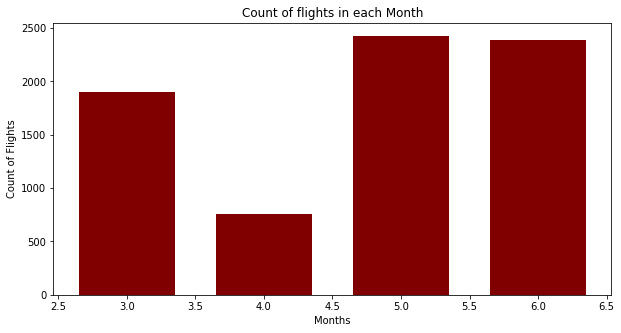

In [31]:
d1 = dict(X_train['journey_month'].value_counts())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(d1.keys(), d1.values(), color ='maroon', width=0.7)

plt.xlabel("Months")
plt.ylabel("Count of Flights")
plt.title("Count of flights in each Month")
plt.show()

{0: 229, 1: 1244, 2: 144, 3: 1429, 4: 2670, 5: 4, 6: 823, 7: 5, 8: 582, 10: 345, 11: 2}


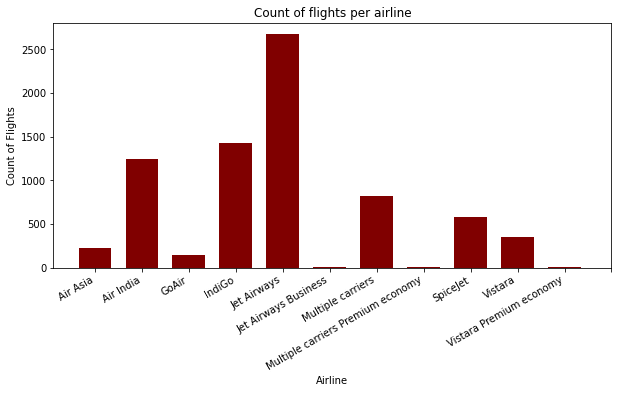

In [32]:
d2 = dict(X_train['Airline'].value_counts())
d2 = dict(sorted(d2.items()))
print(d2)

fig = plt.figure(figsize = (10,5))
 
# creating the bar plot
plt.bar([encoded_var[0][i] for i in d2.keys()], d2.values(), color ='maroon', width=0.7)

plt.xlabel("Airline")
plt.ylabel("Count of Flights")
plt.title("Count of flights per airline")
plt.xticks([i for i in range(0,12)])
plt.gcf().autofmt_xdate()
plt.show()

In [33]:
new_df = X_train.copy()
new_df['Price'] = Y_train
corr_matrix = new_df.corr()
corr_matrix['Price'].sort_values(ascending=False) 

Price            1.000000
Total_Stops      0.598473
duration_min     0.506688
arrival_hour     0.024408
Source           0.003415
dep_hour        -0.002239
dep_min         -0.023443
Airline         -0.047995
Destination     -0.062455
arrival_min     -0.086660
journey_month   -0.109499
journey_day     -0.152949
Name: Price, dtype: float64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

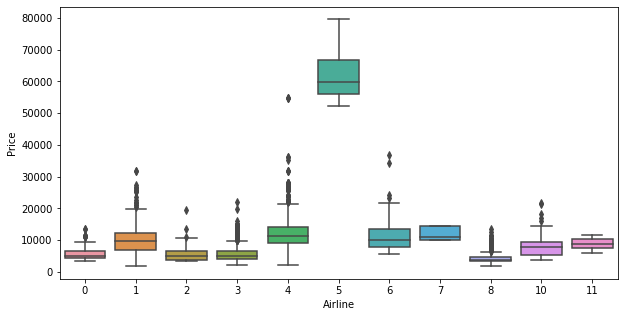

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Airline',y='Price',data=pd.concat([X_train,Y_train],axis=1))

In [35]:
encoded_var[0][5]

'Jet Airways Business'

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

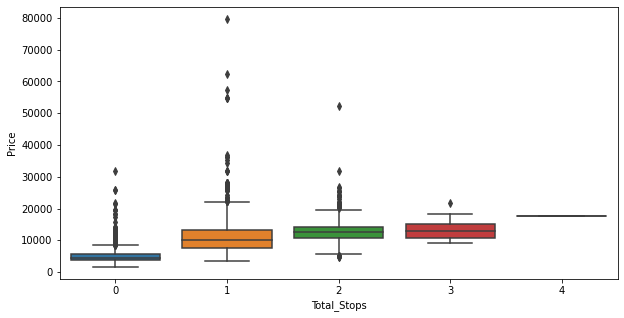

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops',y='Price',data=new_df.sort_values('Price',ascending=False))

{0: 'Banglore', 1: 'Chennai', 2: 'Delhi', 3: 'Kolkata', 4: 'Mumbai'}

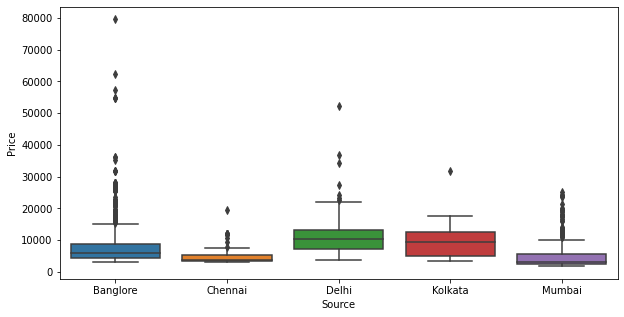

In [37]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Source',y='Price',data=new_df.sort_values('Price',ascending=False))
labels = encoded_var[1].values()
temp = ax.set_xticklabels(labels)
encoded_var[1]

{0: 'Banglore',
 1: 'Cochin',
 2: 'Delhi',
 3: 'Hyderabad',
 4: 'Kolkata',
 5: 'New Delhi'}

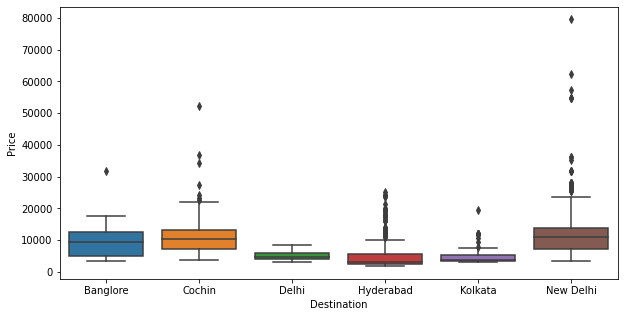

In [38]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Destination',y='Price',data=new_df.sort_values('Price',ascending=False))
labels = encoded_var[2].values()
temp = ax.set_xticklabels(labels)
encoded_var[2]

<AxesSubplot:xlabel='Price', ylabel='Density'>

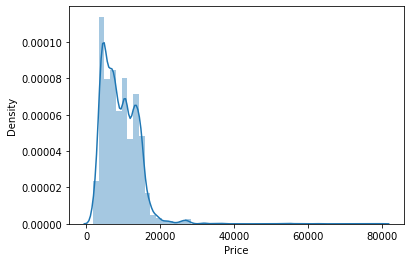

In [39]:
sns.distplot(new_df['Price'])

# Training Models

In [40]:
scores = pd.DataFrame()
scores['Score'] = ["MSE", "MAE", "R2 Score"]
scores

,Score
0,MSE
1,MAE
2,R2 Score


In [41]:
from sklearn.neighbors import KNeighborsRegressor

# k_range = list(range(1, 30, 2))
# params = dict(n_neighbors = k_range)
# knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv=5, scoring = 'neg_mean_squared_error')

# knn_regressor.fit(X_train, Y_train)

In [42]:
# knn_regressor.best_params_
# {'n_neighbors': 5}
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, Y_train)

KNeighborsRegressor()

In [43]:
y_train_pred = knn_regressor.predict(X_train) 
y_test_pred = knn_regressor.predict(X_test)

print("Train Results for KNN Regressor Model:")

print("Root mean squared error: ", sqrt(mse(Y_train, y_train_pred)))
print("Mean absolute error: ", mae(Y_train, y_train_pred))
# print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))
scores['KNN_train'] = [sqrt(mse(Y_train, y_train_pred)), mae(Y_train, y_train_pred), r2_score(Y_train, y_train_pred)]
print()
print(50 * '-')
print("Test Results for KNN Regressor Model:")
print("Root mean squared error: ", sqrt(mse(Y_test, y_test_pred)))
print("Mean absolute error: ", mae(Y_test, y_test_pred))
# print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))
scores['KNN_test'] = [sqrt(mse(Y_test, y_test_pred)), mae(Y_test, y_test_pred), r2_score(Y_test, y_test_pred)]

Train Results for KNN Regressor Model:
Root mean squared error:  2559.7249773267877
Mean absolute error:  1471.8338103517451
R-squared:  0.6996500915815655

--------------------------------------------------
Test Results for KNN Regressor Model:
Root mean squared error:  3039.6544815757425
Mean absolute error:  1866.1083307332294
R-squared:  0.5375376312158354


In [44]:
from sklearn.tree import DecisionTreeRegressor

# max_depth = list(range(2, 30, 2))
# params = dict(max_depth = max_depth)
# reg_tree = GridSearchCV(DecisionTreeRegressor(), params, cv = 10)
# reg_tree.fit(X_train, Y_train)

In [45]:
# reg_tree.best_params_
# {'max_depth': 12}
reg_tree = DecisionTreeRegressor(max_depth=12)
reg_tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=12)

In [46]:
y_train_pred = reg_tree.predict(X_train) 
y_test_pred = reg_tree.predict(X_test)

print("Train Results for Decision Tree Regressor Model:")

print("Root mean squared error: ", sqrt(mse(Y_train, y_train_pred)))
print("Mean absolute error: ", mae(Y_train, y_train_pred))
# print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))
scores['DecTree_train'] = [sqrt(mse(Y_train, y_train_pred)), mae(Y_train, y_train_pred), r2_score(Y_train, y_train_pred)]
print()
print(50 * '-')
print("Test Results for Decision Tree Regressor Model:")
print("Root mean squared error: ", sqrt(mse(Y_test, y_test_pred)))
print("Mean absolute error: ", mae(Y_test, y_test_pred))
# print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))
scores['DecTree_test'] = [sqrt(mse(Y_test, y_test_pred)), mae(Y_test, y_test_pred), r2_score(Y_test, y_test_pred)]

Train Results for Decision Tree Regressor Model:
Root mean squared error:  1353.5635819579222
Mean absolute error:  842.739349470232
R-squared:  0.9160156793699195

--------------------------------------------------
Test Results for Decision Tree Regressor Model:
Root mean squared error:  2270.856525842567
Mean absolute error:  1316.8331264674164
R-squared:  0.7418885019230352


In [47]:
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators': [100, 200, 300, 400, 500]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), params, n_iter = 10, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [48]:
random_regressor.best_estimator_
# random_regressor = RandomForestRegressor()
# random_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500)

In [49]:
y_train_pred = random_regressor.predict(X_train) 
y_test_pred = random_regressor.predict(X_test)

print("Train Results for Random Forest Regressor Model:")

print("Root mean squared error: ", sqrt(mse(Y_train, y_train_pred)))
print("Mean absolute error: ", mae(Y_train, y_train_pred))
# print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))
scores['RF_train'] = [sqrt(mse(Y_train, y_train_pred)), mae(Y_train, y_train_pred), r2_score(Y_train, y_train_pred)]
print()
print(50 * '-')
print("Test Results for Random Forest Regressor Model:")
print("Root mean squared error: ", sqrt(mse(Y_test, y_test_pred)))
print("Mean absolute error: ", mae(Y_test, y_test_pred))
# print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))
scores['RF_test'] = [sqrt(mse(Y_test, y_test_pred)), mae(Y_test, y_test_pred), r2_score(Y_test, y_test_pred)]

Train Results for Random Forest Regressor Model:
Root mean squared error:  988.048457103001
Mean absolute error:  550.0169058092242
R-squared:  0.9552495527613655

--------------------------------------------------
Test Results for Random Forest Regressor Model:
Root mean squared error:  2092.6656860676358
Mean absolute error:  1220.648040752993
R-squared:  0.7808065029232186


In [50]:
from xgboost import XGBRegressor

# tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
# xgb = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
# xgb.fit(X_train, Y_train)

In [51]:
# xgb.best_estimator_
xgb = XGBRegressor(max_depth=4, n_estimators=400, reg_lambda=0.001)
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.001, ...)

In [52]:
y_train_pred = xgb.predict(X_train) 
y_test_pred = xgb.predict(X_test)

print("Train Results for XGBoost Regressor Model:")

print("Root mean squared error: ", sqrt(mse(Y_train, y_train_pred)))
print("Mean absolute error: ", mae(Y_train, y_train_pred))
# print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))
scores['XGB_train'] = [sqrt(mse(Y_train, y_train_pred)), mae(Y_train, y_train_pred), r2_score(Y_train, y_train_pred)]
print(50 * '-')
print("Test Results for XGBoost Regressor Model:")
print("Root mean squared error: ", sqrt(mse(Y_test, y_test_pred)))
print("Mean absolute error: ", mae(Y_test, y_test_pred))
# print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))
scores['XGB_test'] = [sqrt(mse(Y_test, y_test_pred)), mae(Y_test, y_test_pred), r2_score(Y_test, y_test_pred)]

Train Results for XGBoost Regressor Model:
Root mean squared error:  1216.8903892917442
Mean absolute error:  844.0514251517153
R-squared:  0.932119690513995
--------------------------------------------------
Test Results for XGBoost Regressor Model:
Root mean squared error:  1891.737188508701
Mean absolute error:  1247.1072205446812
R-squared:  0.8208777391433066


In [53]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(random_state=1)
mlpr.fit(X_train, Y_train)

MLPRegressor(random_state=1)

In [54]:
y_train_pred = mlpr.predict(X_train) 
y_test_pred = mlpr.predict(X_test)

print("Train Results for NN Regressor Model:")

print("Root mean squared error: ", sqrt(mse(Y_train, y_train_pred)))
print("Mean absolute error: ", mae(Y_train, y_train_pred))
# print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))
scores['NN_train'] = [sqrt(mse(Y_train, y_train_pred)), mae(Y_train, y_train_pred), r2_score(Y_train, y_train_pred)]
print(50 * '-')
print("Test Results for NN Regressor Model:")
print("Root mean squared error: ", sqrt(mse(Y_test, y_test_pred)))
print("Mean absolute error: ", mae(Y_test, y_test_pred))
# print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))
scores['NN_test'] = [sqrt(mse(Y_test, y_test_pred)), mae(Y_test, y_test_pred), r2_score(Y_test, y_test_pred)]

Train Results for NN Regressor Model:
Root mean squared error:  3637.5959732231954
Mean absolute error:  2466.557413556787
R-squared:  0.3934455234823194
--------------------------------------------------
Test Results for NN Regressor Model:
Root mean squared error:  3477.7719319633484
Mean absolute error:  2445.397856394782
R-squared:  0.3946170915896242


In [55]:
scores

,Score,KNN_train,KNN_test,DecTree_train,DecTree_test,RF_train,RF_test,XGB_train,XGB_test,NN_train,NN_test
0,MSE,2559.724977,3039.654482,1353.563582,2270.856526,988.048457,2092.665686,1216.890389,1891.737189,3637.595973,3477.771932
1,MAE,1471.833810,1866.108331,842.739349,1316.833126,550.016906,1220.648041,844.051425,1247.107221,2466.557414,2445.397856
2,R2 Score,0.699650,0.537538,0.916016,0.741889,0.955250,0.780807,0.932120,0.820878,0.393446,0.394617


# Tuning hyperparameters

## Random Forest Regressor

In [56]:
print('Parameters currently in use:\n')
random_regressor.get_params()

Parameters currently in use:



{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(),
 'n_iter': 10,
 'n_jobs': -1,
 'param_distributions': {'n_estimators': [100, 200, 300, 400, 500]},
 'pre_dispatch': '2*n_jobs',
 'random_state': None,
 'refit': True,
 'return_train_score': False,
 'scoring': 'neg_mean_absolute_error',
 'verbose': 0}

In [57]:
params = {'n_estimators' : [100, 200, 300, 400, 500, 800, 1000], 
          'max_depth' : [i for i in range(10,110,10)],
          'min_samples_leaf' : [1,2,4],
          'min_samples_split': [2, 5, 10]
          }
random_regressor = RandomizedSearchCV(RandomForestRegressor(), params, n_iter = 10, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, Y_train)
random_regressor.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_split=5, n_estimators=500)

In [58]:
y_train_pred = random_regressor.predict(X_train) 
y_test_pred = random_regressor.predict(X_test)

print("Train Results for Random Forest Regressor Model:")

print("Root mean squared error: ", sqrt(mse(Y_train, y_train_pred)))
print("Mean absolute error: ", mae(Y_train, y_train_pred))
# print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))
# scores['RF_train'] = [sqrt(mse(Y_train, y_train_pred)), mae(Y_train, y_train_pred), r2_score(Y_train, y_train_pred)]
print()
print(50 * '-')
print("Test Results for Random Forest Regressor Model:")
print("Root mean squared error: ", sqrt(mse(Y_test, y_test_pred)))
print("Mean absolute error: ", mae(Y_test, y_test_pred))
# print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))
# scores['RF_test'] = [sqrt(mse(Y_test, y_test_pred)), mae(Y_test, y_test_pred), r2_score(Y_test, y_test_pred)]

Train Results for Random Forest Regressor Model:
Root mean squared error:  1233.9505855052366
Mean absolute error:  681.6563249961787
R-squared:  0.9302030527287262

--------------------------------------------------
Test Results for Random Forest Regressor Model:
Root mean squared error:  2030.3488630180805
Mean absolute error:  1191.308237845058
R-squared:  0.793666715019995


## XGB Boost

In [59]:
print('Parameters currently in use:\n')
xgb.get_params()

Parameters currently in use:



{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 4,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 400,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 0.001,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [60]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5, 6, 8, 10, 12],
                'learning_rate': [0.01, 0.05, 0.1],
                'n_estimators': [100, 200, 300, 400, 500],
                'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]
                }
xgb = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
xgb.fit(X_train, Y_train)
xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1.0, ...)

In [61]:
xgb = xgb.best_estimator_

In [62]:
y_train_pred = xgb.predict(X_train) 
y_test_pred = xgb.predict(X_test)

print("Train Results for XGBoost Regressor Model:")

print("Root mean squared error: ", sqrt(mse(Y_train, y_train_pred)))
print("Mean absolute error: ", mae(Y_train, y_train_pred))
# print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))
scores['XGB_train'] = [sqrt(mse(Y_train, y_train_pred)), mae(Y_train, y_train_pred), r2_score(Y_train, y_train_pred)]
print(50 * '-')
print("Test Results for XGBoost Regressor Model:")
print("Root mean squared error: ", sqrt(mse(Y_test, y_test_pred)))
print("Mean absolute error: ", mae(Y_test, y_test_pred))
# print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))
scores['XGB_test'] = [sqrt(mse(Y_test, y_test_pred)), mae(Y_test, y_test_pred), r2_score(Y_test, y_test_pred)]

Train Results for XGBoost Regressor Model:
Root mean squared error:  897.6035258698644
Mean absolute error:  552.3986546209156
R-squared:  0.9630673907548892
--------------------------------------------------
Test Results for XGBoost Regressor Model:
Root mean squared error:  1880.3821070577164
Mean absolute error:  1173.2226482897206
R-squared:  0.823021634739578


In [63]:
import pickle 
file = open('final_model1.pkl', 'wb')
pickle.dump(xgb, file)

In [64]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1.0, ...)